In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#reading the csv files
df = pd.read_csv(r"C:\Users\Yemi\Documents\archive (1) group data\Invistico_Airline.csv")

In [3]:
#Viewing the first 5 rows of the data set
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
#showing number of rows and columns in the dataset
df.shape

(129880, 23)

In [5]:
#Describing the dataset
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [7]:
#renaming columns leg room service, ease of online booking and flight distance correctly
df.rename(columns={'Leg room service': 'Leg_rooms_service', 'Ease of Online booking': 'Ease_of_Online_booking', 
                   'Flight Distance': 'Flight_Distance', 'Food and drink': 'Food_drink', 'Online support': 'Online_support','On-board service' : 'On_board_service'}, inplace=True)


<Axes: ylabel='Frequency'>

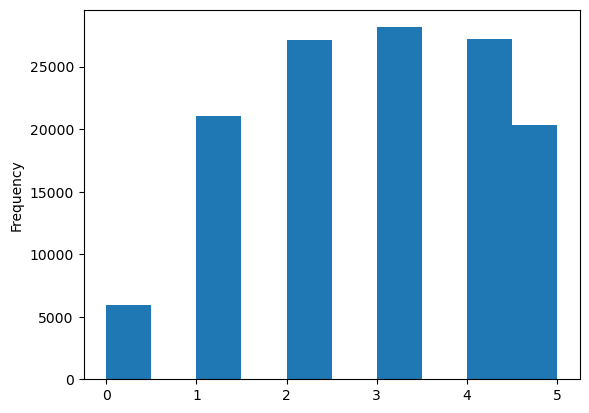

In [8]:
#view of food and drinks distribution
df.Food_drink.plot.hist()

<Axes: ylabel='Frequency'>

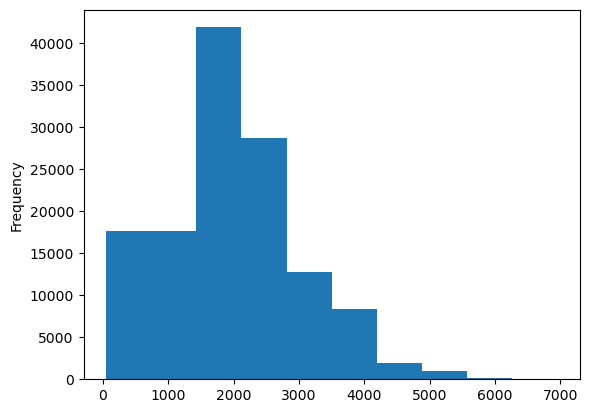

In [9]:
#view of flight_distance distribution
df.Flight_Distance.plot.hist()

<Axes: ylabel='Frequency'>

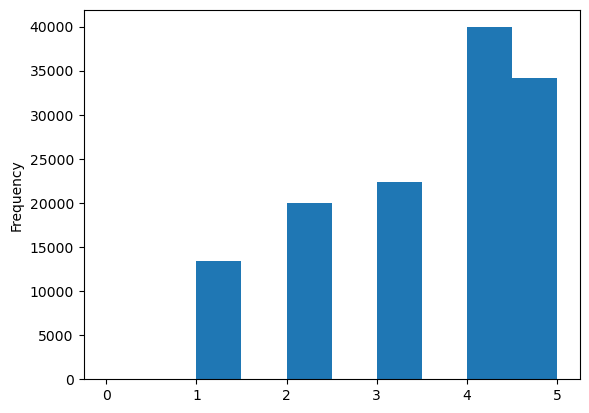

In [10]:
#view of ease of online booking distribution
df.Ease_of_Online_booking.plot.hist()

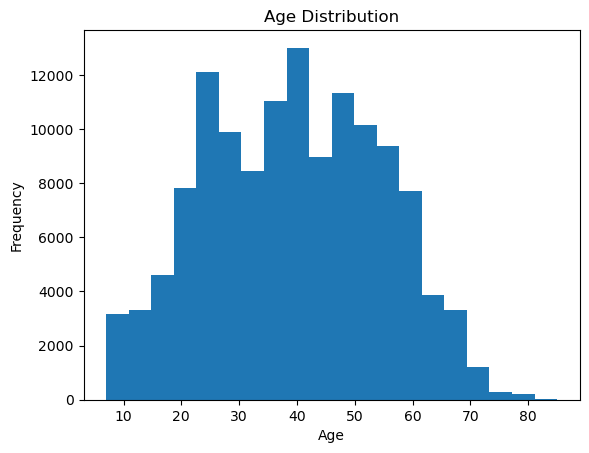

In [11]:
#view of Age distribution
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

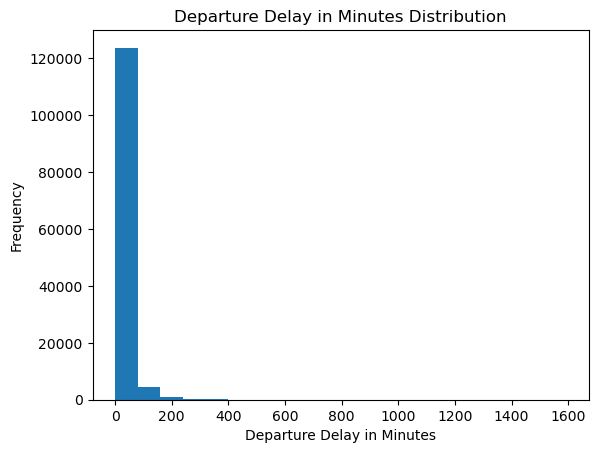

In [12]:
# Histogram of Departure Delay in Minutes
plt.hist(df['Departure Delay in Minutes'], bins=20)
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Departure Delay in Minutes Distribution')
plt.show()

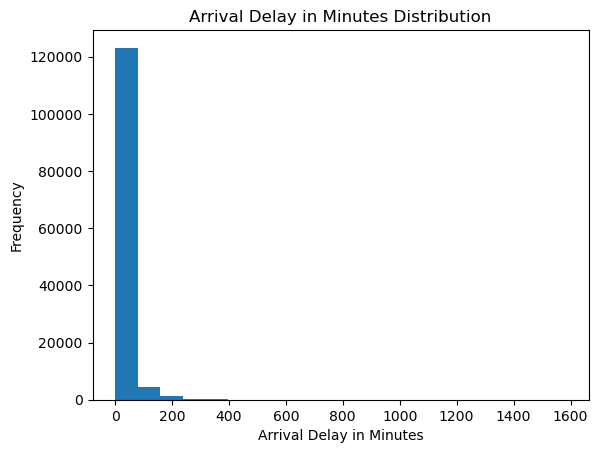

In [13]:
# Histogram of Arrival Delay in Minutes
plt.hist(df['Arrival Delay in Minutes'], bins=20)
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Arrival Delay in Minutes Distribution')
plt.show()

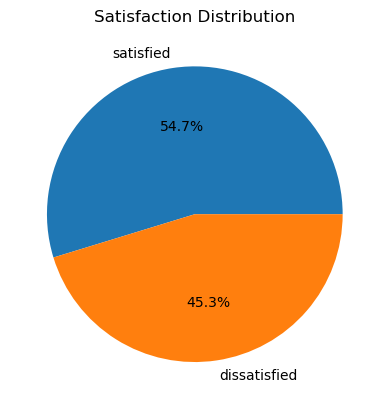

In [14]:
# create a count of each category
counts = df['satisfaction'].value_counts()
# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# add a title
plt.title('Satisfaction Distribution')
# show the plot
plt.show()

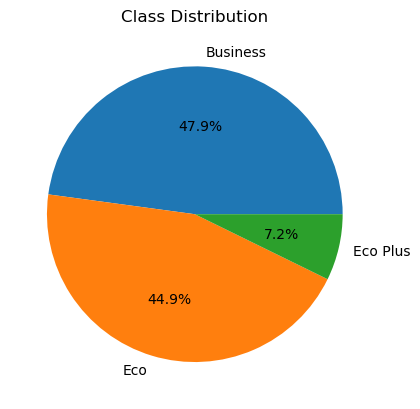

In [15]:
# create a count of each category
counts = df['Class'].value_counts()
# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# add a title
plt.title('Class Distribution')
# show the plot
plt.show()

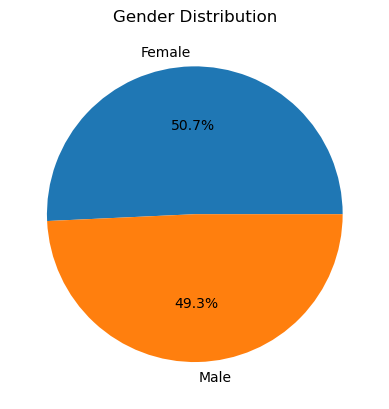

In [16]:
# create a count of each category
counts = df['Gender'].value_counts()
# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# add a title
plt.title('Gender Distribution')
# show the plot
plt.show()

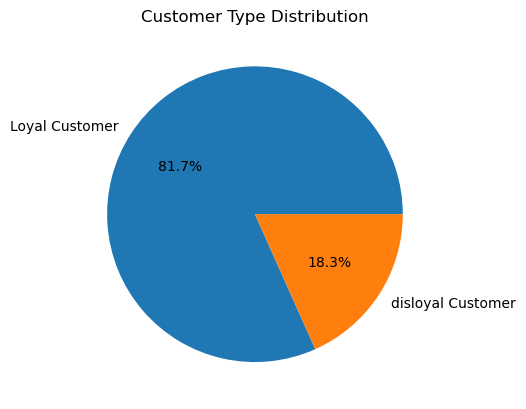

In [17]:
# create a count of each category
counts = df['Customer Type'].value_counts()
# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# add a title
plt.title('Customer Type Distribution')
# show the plot
plt.show()

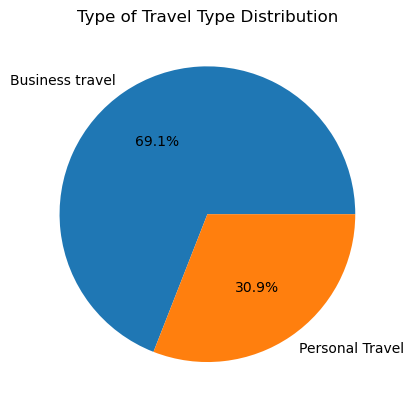

In [18]:
# create a count of each category
counts = df['Type of Travel'].value_counts()
# create a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
# add a title
plt.title('Type of Travel Type Distribution')
# show the plot
plt.show()

<Axes: xlabel='On_board_service', ylabel='satisfaction'>

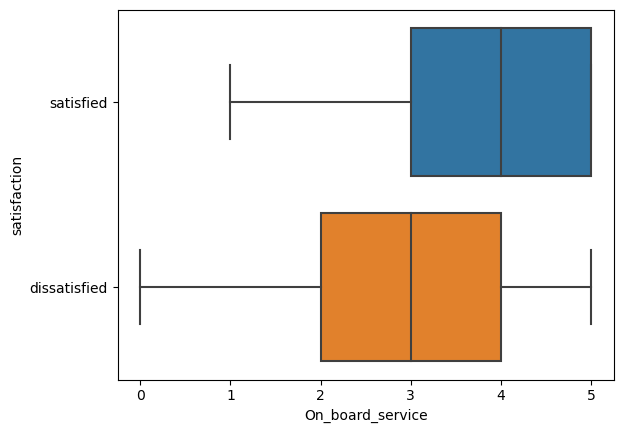

In [19]:
#showing the count of observation for satisfaction and on  board service in the dataset
sns.boxplot(x='On_board_service', y='satisfaction', data=df, orient='h')

<Axes: xlabel='Online_support', ylabel='satisfaction'>

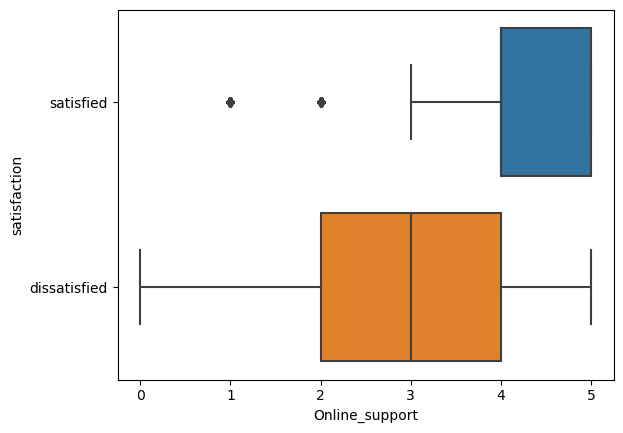

In [20]:
#showing the count of observation for satisfaction and online service in the dataset
sns.boxplot(x='Online_support', y='satisfaction',  data=df, orient='h')

In [21]:
# classification of categorical variables to binary form
df['satisfaction'] = df['satisfaction'].replace({'satisfied': 1, 'dissatisfied': 0})
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].replace({'Loyal Customer': 1, 'disloyal Customer': 0})
df['Type of Travel'] = df['Type of Travel'].replace({'Personal Travel': 1, 'Business travel': 0})
df['Class'] = df['Class'].replace({'Business': 2, 'Eco': 1, 'Eco Plus': 0})

# print the resulting dataframe
print(df)

        satisfaction  Gender  Customer Type  Age  Type of Travel  Class  \
0                  1       1              1   65               1      1   
1                  1       0              1   47               1      2   
2                  1       1              1   15               1      1   
3                  1       1              1   60               1      1   
4                  1       1              1   70               1      1   
...              ...     ...            ...  ...             ...    ...   
129875             1       1              0   29               1      1   
129876             0       0              0   63               1      2   
129877             0       0              0   69               1      1   
129878             0       0              0   66               1      1   
129879             0       1              0   38               1      1   

        Flight_Distance  Seat comfort  Departure/Arrival time convenient  \
0                   265

In [22]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight_Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food_drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online_support',
       'Ease_of_Online_booking', 'On_board_service', 'Leg_rooms_service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [23]:
# fill missing values in the specified column with the mean
mean_value = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(mean_value)

In [24]:
#Separate the features and the target variable (Satisfaction)
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

In [25]:
#Split the data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
#Define the random forest model and fit the RF model on the train data
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)   

RandomForestRegressor(random_state=42)

In [27]:
#Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('Test MAE score:', mean_absolute_error(y_test, y_pred))
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE score:', sqrt(mean_squared_error(y_test, y_pred)))
#print('Test RMSE score:', mean_squared_error(y_test, y_pred, squared=False))

Test R2 score: 0.8797793695324161
Test MSE score: 0.02974799815214044
Test MAE score: 0.0643193717277487
Test RMSE score: 0.1724760799419457


Inflight wifi service                0.006036
Food_drink                           0.009576
Departure Delay in Minutes           0.010368
Online boarding                      0.010863
On_board_service                     0.011081
Arrival Delay in Minutes             0.013204
Cleanliness                          0.015701
Baggage handling                     0.017331
Gender                               0.017568
Leg_rooms_service                    0.018447
Online_support                       0.019665
Departure/Arrival time convenient    0.020536
Checkin service                      0.020557
Class                                0.021242
Gate location                        0.023023
Age                                  0.025360
Flight_Distance                      0.030106
Type of Travel                       0.034125
Customer Type                        0.041698
Ease_of_Online_booking               0.064355
Seat comfort                         0.179282
Inflight entertainment            

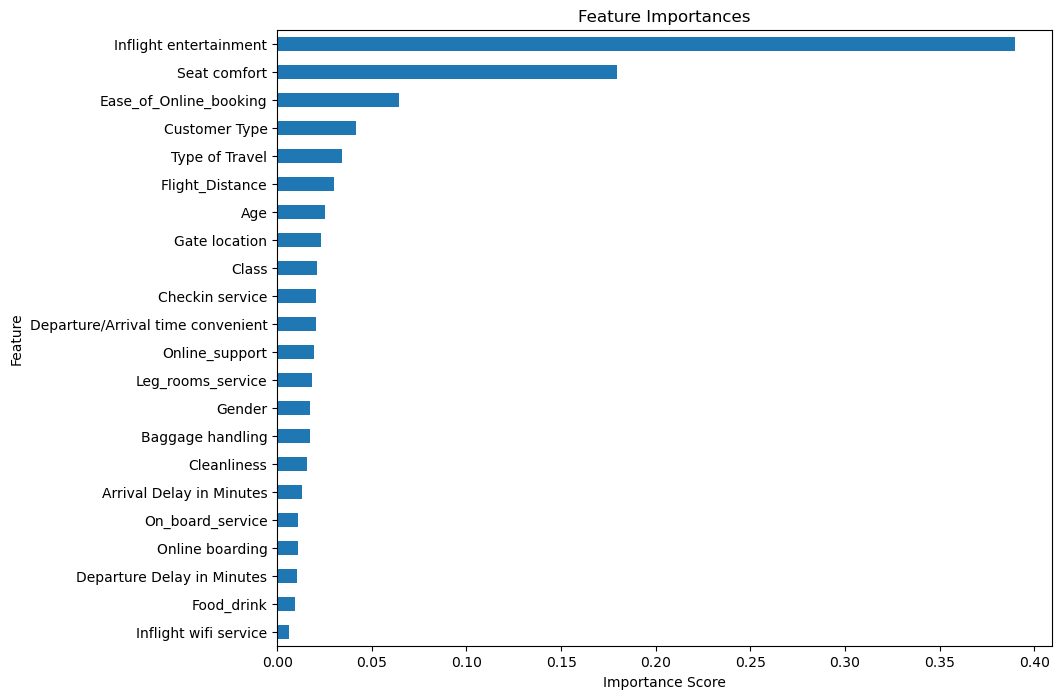

In [28]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True) # sort the feature importances in ascending order
plt.figure(figsize=(10,8)) # set the figure size
importances_sorted.plot(kind='barh') # create a horizontal bar plot of the feature importances
plt.title('Feature Importances') # add a title to the plot
plt.xlabel('Importance Score') # add a label to the x-axis
plt.ylabel('Feature') # add a label to the y-axis
print(importances_sorted)
plt.show() # show the plot


Define the RF model with OOB, fit the RF model using the train data, evaluate the OOB scores, and plot the feature importance

In [29]:
# RF Model
rf_modelWithoob = RandomForestRegressor(random_state=42, oob_score=True)

# RF model fit with OOB
rf_modelWithoob.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [30]:
# Evaluate OOB score
print('OOB R2 score:', rf_modelWithoob.oob_score_)
print('OOB MSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_))
print('OOB MAE score:', mean_absolute_error(y_train, rf_modelWithoob.oob_prediction_))
print('OOB RMSE score:', mean_squared_error(y_train, rf_modelWithoob.oob_prediction_, squared=False))

OOB R2 score: 0.8721396247381487
OOB MSE score: 0.031688345661270496
OOB MAE score: 0.0662510190027507
OOB RMSE score: 0.17801220649514599


Inflight wifi service                0.006036
Food_drink                           0.009576
Departure Delay in Minutes           0.010368
Online boarding                      0.010863
On_board_service                     0.011081
Arrival Delay in Minutes             0.013204
Cleanliness                          0.015701
Baggage handling                     0.017331
Gender                               0.017568
Leg_rooms_service                    0.018447
Online_support                       0.019665
Departure/Arrival time convenient    0.020536
Checkin service                      0.020557
Class                                0.021242
Gate location                        0.023023
Age                                  0.025360
Flight_Distance                      0.030106
Type of Travel                       0.034125
Customer Type                        0.041698
Ease_of_Online_booking               0.064355
Seat comfort                         0.179282
Inflight entertainment            

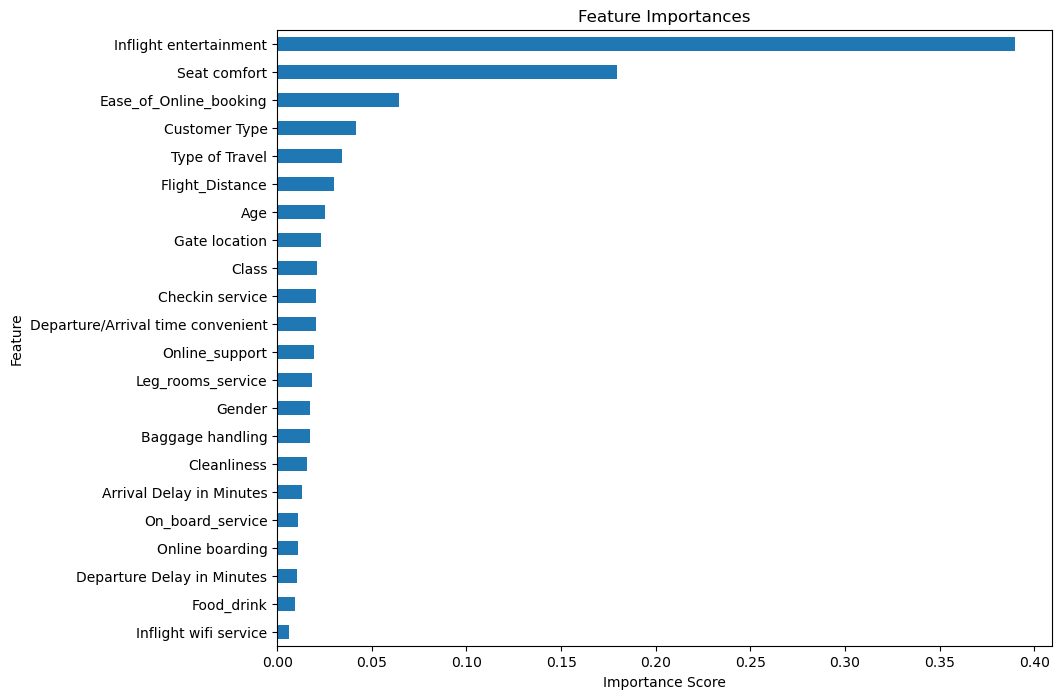

In [31]:
# Obtain feature importances and plot them
#importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
#print(importances)
#importances.plot(kind='barh')
#plt.show()

importances = pd.Series(rf_modelWithoob.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True) # sort the feature importances in ascending order
plt.figure(figsize=(10,8)) # set the figure size
importances_sorted.plot(kind='barh') # create a horizontal bar plot of the feature importances
plt.title('Feature Importances') # add a title to the plot
plt.xlabel('Importance Score') # add a label to the x-axis
plt.ylabel('Feature') # add a label to the y-axis
print(importances_sorted)
plt.show() # show the plot

In [32]:
#Define the hyperparameters to tune (number of trees)
param_grid = {
    'n_estimators': [200, 400, 600, 800]
    #,'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]
}

In [33]:
#Define the scoring metric

scoring = {'R2': 'r2', 'MSE': 'neg_mean_squared_error', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}
print(scoring)

{'R2': 'r2', 'MSE': 'neg_mean_squared_error', 'MAE': 'neg_mean_absolute_error', 'RMSE': 'neg_root_mean_squared_error'}


In [34]:
#Perform the Grid Search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [200, 400, 600, 800]}, refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

In [35]:
#Evaluate the model on the test data set
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('Test MAE score:', mean_absolute_error(y_test, y_pred))
print('Test RMSE score:', mean_squared_error(y_test, y_pred, squared=False))

Test R2 score: 0.8809546154329964
Test MSE score: 0.029457189388762704
Test MAE score: 0.06431287534647366
Test RMSE score: 0.17163096861802857


In [36]:
#Display the best hyperparameters and corresponding R2, MSE, MAE and RMSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('Best MAE score:', abs(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))
print('Best RMSE score:', abs(grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_]))

Best hyperparameters: {'n_estimators': 800}
Best R2 score: 0.8716963495067416
Best MSE score: 0.03179769201849242
Best MAE score: 0.06859900184373831
Best RMSE score: 0.17831113880478439


Inflight wifi service                0.006111
Food_drink                           0.009752
Departure Delay in Minutes           0.010596
Online boarding                      0.010875
On_board_service                     0.011102
Arrival Delay in Minutes             0.013087
Cleanliness                          0.015693
Baggage handling                     0.017251
Gender                               0.017576
Leg_rooms_service                    0.018312
Online_support                       0.019708
Departure/Arrival time convenient    0.020484
Checkin service                      0.020528
Class                                0.021414
Gate location                        0.022906
Age                                  0.025562
Flight_Distance                      0.030191
Type of Travel                       0.034006
Customer Type                        0.041506
Ease_of_Online_booking               0.064381
Seat comfort                         0.179099
Inflight entertainment            

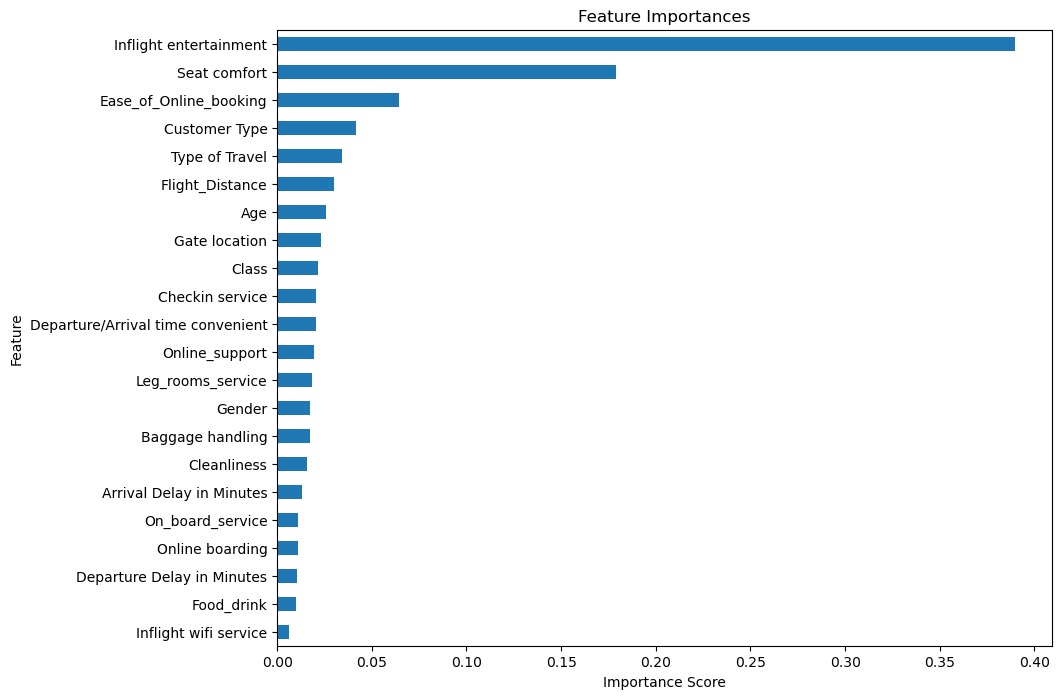

In [37]:
#Obtain the feature importances and plot them
importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=True) # sort the feature importances in ascending order
plt.figure(figsize=(10,8)) # set the figure size
importances_sorted.plot(kind='barh') # create a horizontal bar plot of the feature importances
plt.title('Feature Importances') # add a title to the plot
plt.xlabel('Importance Score') # add a label to the x-axis
plt.ylabel('Feature') # add a label to the y-axis
print(importances_sorted)
plt.show() # show the plot

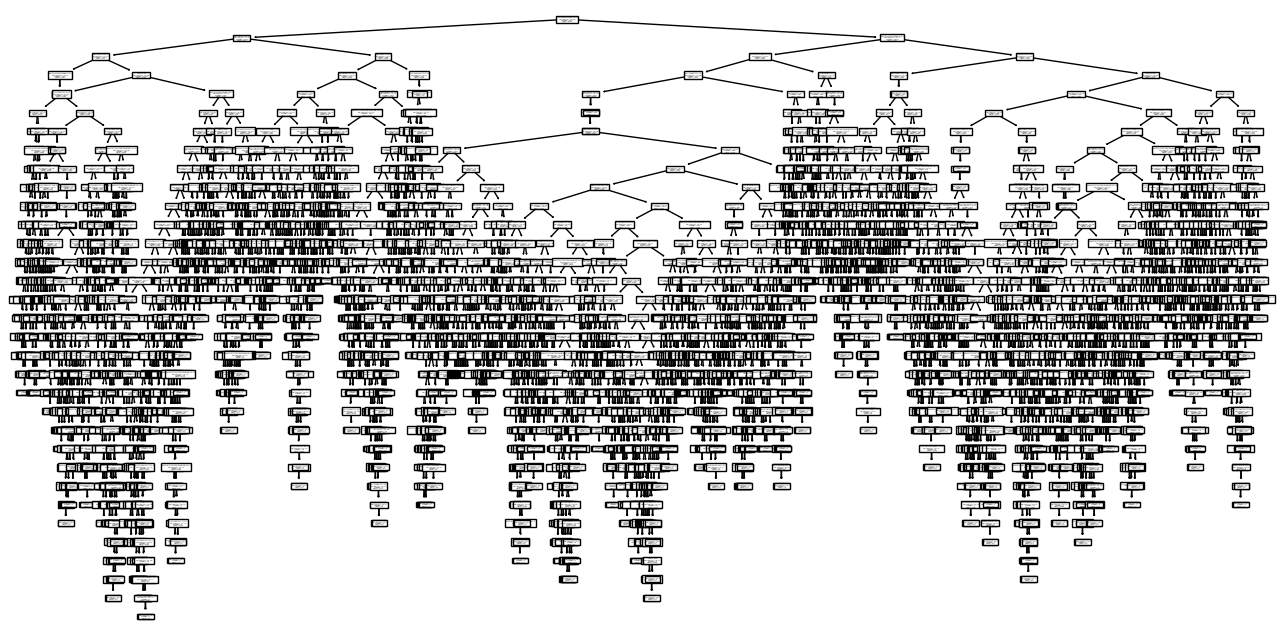

In [38]:
#Diaplay the decision tree (first tree in the forest)
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()

In [39]:
#Perform a Grid Search using the RF model with OOB. Evaluate the model on the test data set, display the best hyperparameters, R2,MSE,MAE and RMSE also display the OOB score, R2,MSE,MAE and RMSE. Obtain the feature importance and a sample tree.

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_modelWithoob, param_grid=param_grid, cv=5, scoring=scoring, refit='R2')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             param_grid={'n_estimators': [200, 400, 600, 800]}, refit='R2',
             scoring={'MAE': 'neg_mean_absolute_error',
                      'MSE': 'neg_mean_squared_error', 'R2': 'r2',
                      'RMSE': 'neg_root_mean_squared_error'})

Test R2 score: 0.8809546154329964
Test MSE score: 0.029457189388762704
Test MAE score: 0.06431287534647366
Test RMSE score: 0.17163096861802857


Best hyperparameters: {'n_estimators': 800}
Best R2 score: 0.8716963495067416
Best MSE score: 0.03179769201849242
Best MAE score: 0.06859900184373831
Best RMSE score: 0.17831113880478439


OOB score: 0.8752228702996393
OOB MSE score: 0.030924207820199712
OOB R2 score: 0.8752228702996393
OOB MAE score: 0.06627701869560979
OOB RMSE score: 0.17585280157051725


Inflight wifi service                0.006111
Food_drink                           0.009752
Departure Delay in Minutes           0.010596
Online boarding                      0.010875
On_board_service                     0.011102
Arrival Delay in Minutes             0.013087
Cleanliness                          0.015693
Baggage handling                     0.017251
Gender                               0.017576
Leg_rooms_service                    0.018312
Online_support                   

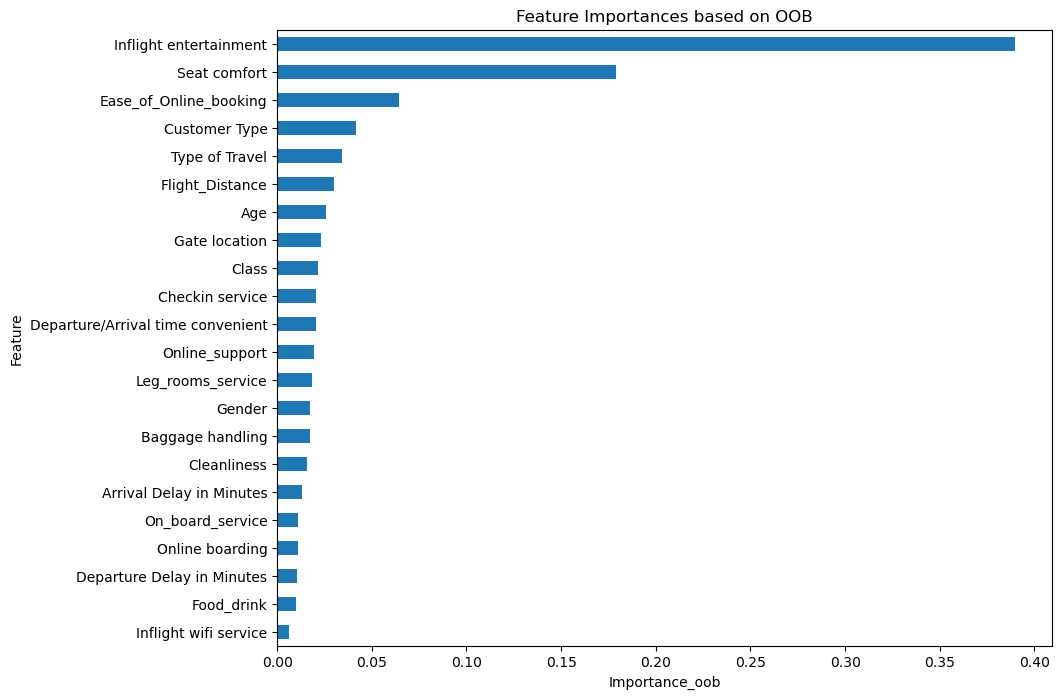

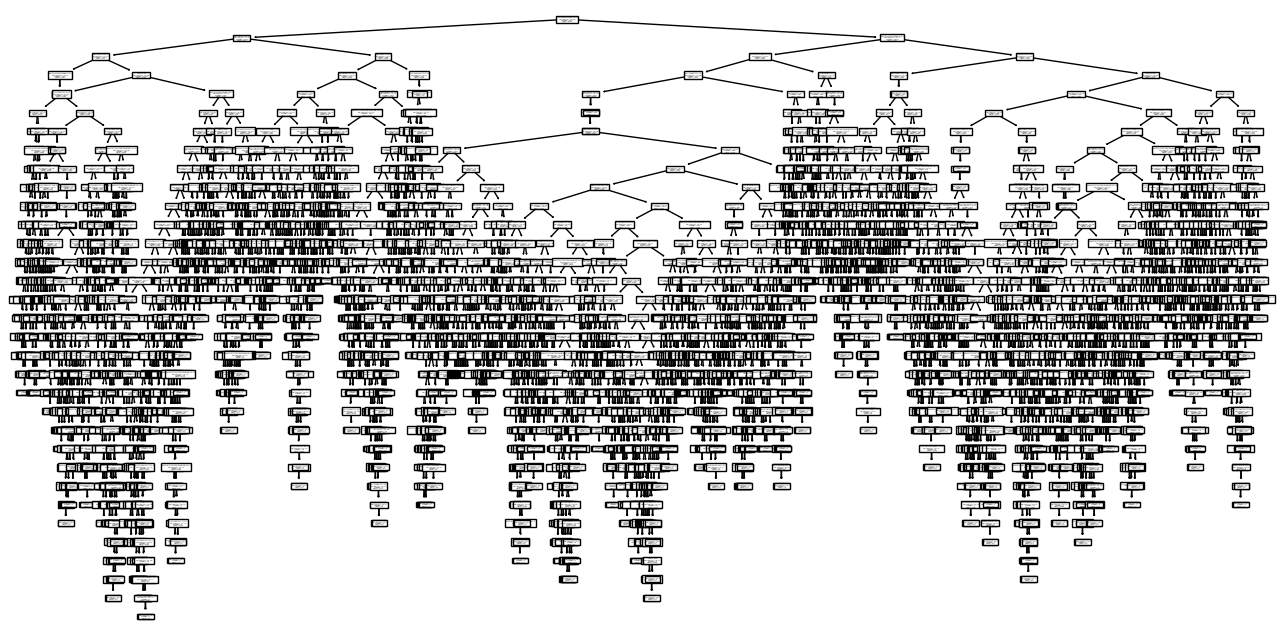

In [40]:
# Evaluate model on test set
y_pred = grid_search.predict(X_test)
print('Test R2 score:', r2_score(y_test, y_pred))
print('Test MSE score:', mean_squared_error(y_test, y_pred))
print('Test MAE score:', mean_absolute_error(y_test, y_pred))
print('Test RMSE score:', mean_squared_error(y_test, y_pred, squared=False))
print('\n')

# Display best hyperparameters and corresponding R2 and MSE scores
print('Best hyperparameters:', grid_search.best_params_)
print('Best R2 score:', grid_search.best_score_)
print('Best MSE score:', abs(grid_search.cv_results_['mean_test_MSE'][grid_search.best_index_]))
print('Best MAE score:', abs(grid_search.cv_results_['mean_test_MAE'][grid_search.best_index_]))
print('Best RMSE score:', abs(grid_search.cv_results_['mean_test_RMSE'][grid_search.best_index_]))
print('\n')

# Display OOB score and related statistics
print('OOB score:', grid_search.best_estimator_.oob_score_)
oob_predictions = grid_search.best_estimator_.oob_prediction_
print('OOB MSE score:', mean_squared_error(y_train, oob_predictions))
print('OOB R2 score:', r2_score(y_train, oob_predictions))
print('OOB MAE score:', mean_absolute_error(y_train, oob_predictions))
print('OOB RMSE score:', mean_squared_error(y_train, oob_predictions, squared=False))
print('\n')

# Obtain feature importances and plot them
#importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
#print('Feature importances based on OOB:')
#print(importances_oob)
#importances_oob.plot(kind='barh')
#plt.show()

importances_oob = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
importances_oob_sorted = importances_oob.sort_values(ascending=True) # sort the feature importances in ascending order
plt.figure(figsize=(10,8)) # set the figure size
importances_oob_sorted.plot(kind='barh') # create a horizontal bar plot of the feature importances
plt.title('Feature Importances based on OOB') # add a title to the plot
plt.xlabel('Importance_oob') # add a label to the x-axis
plt.ylabel('Feature') # add a label to the y-axis
print(importances_oob_sorted)
plt.show() # show the plot

# Display the decision tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(16, 8))
plot_tree(grid_search.best_estimator_[0], ax=ax, feature_names=X_train.columns)
plt.show()